In [3]:
import json
from collections import Counter
import os
import matplotlib.pyplot as plt

In [4]:
datasets = 'Theano,youtube-dl,node,angular,react,opencv,CNTK,\
bitcoin,tensorflow,caffe,elasticsearch,guava'.split(',')
work_dir = os.environ['WORK_DIR']

['Theano',
 'youtube-dl',
 'node',
 'angular',
 'react',
 'opencv',
 'CNTK',
 'bitcoin',
 'tensorflow',
 'caffe',
 'elasticsearch',
 'guava']

In [5]:
results = dict()

In [43]:
results2 = dict()

In [75]:
for i,dataset in enumerate(['tensorflow']):
    dataset_path = os.path.join(work_dir, dataset + "_commits",'json')
    shas = os.listdir(dataset_path)
    counter = Counter()
    index_tracker = 0
    for j,sha in enumerate(shas):
        print('sha {0}/{1} in dataset {2}/{3}\r'.format(j+1,len(shas),i+1,len(datasets)), end='', flush=True)
        with open(os.path.join(dataset_path,sha), 'r') as f:
            sha_meta = json.load(f)
            if not sha_meta['committer']:
                continue
            author_id = sha_meta['committer']['id']
            counter[author_id]+=1
    results[dataset] = dict()
    results[dataset]['counter'] = counter
    results[dataset]['author_count'] = len(set(list(counter.elements())))

In [90]:
results['tensorflow']['counter'].most_common(1)[0][1]

19514

In [81]:
for dataset in ['tensorflow']:
    print('In', dataset)
    for i,key in enumerate(list(results[dataset]['counter'].keys())):
        results[dataset]['counter'][i] = results[dataset]['counter'][key]
        del results[dataset]['counter'][key]

In tensorflow


In [111]:
for threshold in range(10):
    print('------------',threshold)
    for dataset in datasets:
        top = sum([x[1] for x in results[dataset]['counter'].most_common(threshold)])
        total = sum([results[dataset]['counter'][x] for x in results[dataset]['counter'].keys()])
        print(dataset, str(round(top/total*100)) + "%")

------------ 0
Theano 0%
youtube-dl 0%
node 0%
angular 0%
react 0%
opencv 0%
CNTK 0%
bitcoin 0%
tensorflow 0%
caffe 0%
elasticsearch 0%
guava 0%
------------ 1
Theano 42%
youtube-dl 33%
node 22%
angular 15%
react 30%
opencv 16%
CNTK 21%
bitcoin 39%
tensorflow 65%
caffe 31%
elasticsearch 20%
guava 61%
------------ 2
Theano 54%
youtube-dl 61%
node 38%
angular 27%
react 44%
opencv 28%
CNTK 28%
bitcoin 50%
tensorflow 73%
caffe 51%
elasticsearch 30%
guava 81%
------------ 3
Theano 64%
youtube-dl 72%
node 46%
angular 36%
react 51%
opencv 38%
CNTK 33%
bitcoin 60%
tensorflow 78%
caffe 61%
elasticsearch 36%
guava 92%
------------ 4
Theano 68%
youtube-dl 81%
node 53%
angular 45%
react 57%
opencv 45%
CNTK 38%
bitcoin 64%
tensorflow 81%
caffe 69%
elasticsearch 41%
guava 97%
------------ 5
Theano 71%
youtube-dl 87%
node 59%
angular 53%
react 61%
opencv 51%
CNTK 42%
bitcoin 68%
tensorflow 83%
caffe 73%
elasticsearch 46%
guava 99%
------------ 6
Theano 74%
youtube-dl 89%
node 64%
angular 57%
react 66

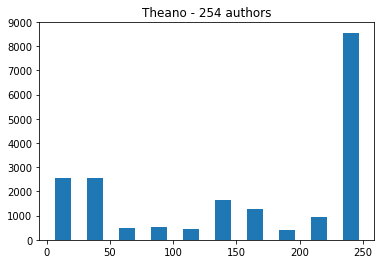

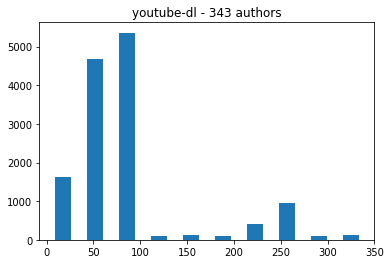

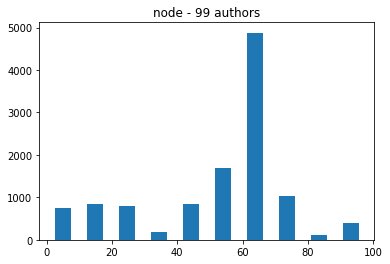

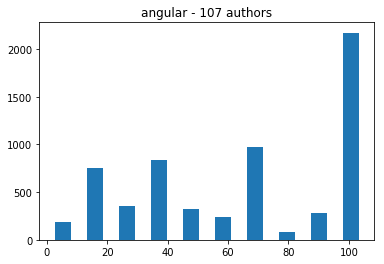

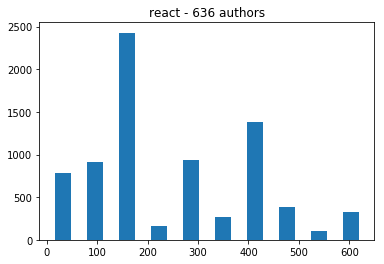

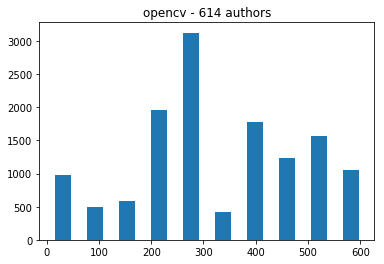

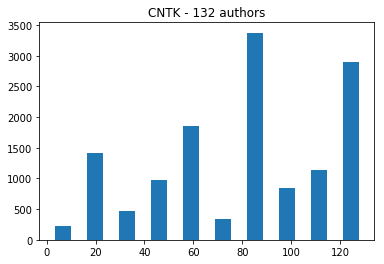

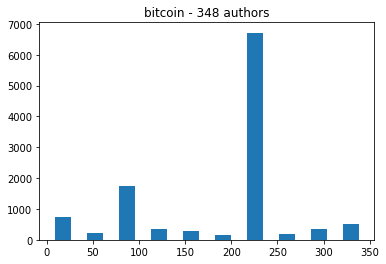

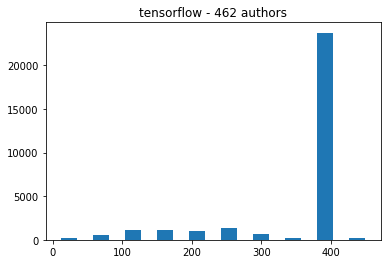

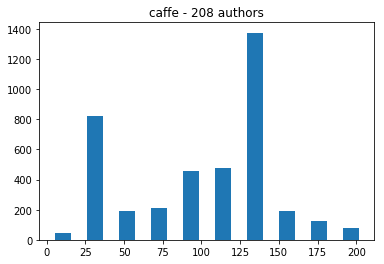

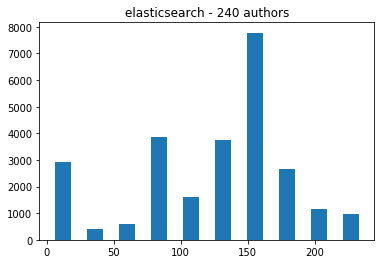

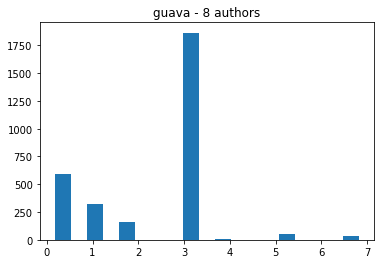

In [74]:
for dataset in datasets:
#     plt.figure(figsize=(10,10))
    plt.hist(list(results[dataset]['counter'].elements()), rwidth=0.5)
    plt.title(dataset + " - " + str(results[dataset]['author_count']) + " authors")
    plt.show()

In [49]:
results['Theano']['counter']

Counter({4502: 3,
         5733: 1,
         8100: 4,
         9321: 1,
         15294: 4,
         27792: 1,
         29542: 1,
         31510: 52,
         41171: 4,
         43829: 6,
         46135: 1,
         50352: 4,
         51236: 1,
         59132: 1,
         60116: 1,
         60206: 387,
         61977: 1,
         65918: 149,
         67496: 51,
         68855: 2,
         107893: 19,
         119799: 1,
         121183: 1,
         144178: 2,
         153965: 103,
         171276: 165,
         172182: 14,
         177628: 43,
         178095: 649,
         178101: 12,
         178249: 2246,
         180987: 8132,
         185856: 1,
         186511: 9,
         190799: 1,
         192976: 1,
         195271: 1,
         206920: 83,
         215200: 1,
         233292: 104,
         234307: 11,
         241247: 3,
         270513: 51,
         294960: 1,
         297607: 2,
         300834: 4,
         306380: 90,
         322311: 2,
         330946: 6,
         334496: